Importing Neccessary libraries

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import linear_model
import matplotlib
from sklearn import metrics
import warnings


Loading Dataset

In [2]:
df = pd.read_csv("C:/Users/Sonali/Desktop/Delhi House Prices.csv")
df.head()

,Type,BHK,Bathroom,Furnishing,Locality,Parking,Status,Transaction,Total_sqft,Price (in Lakhs)
0,Builder_Floor,3,2.0,Semi-Furnished,Rohini Sector 25,1.0,Ready_to_move,New_Property,6500.0,65.00\n%%
1,Apartment,2,2.0,Semi-Furnished,"J R Designers Floors, Rohini Sector 24",1.0,Ready_to_move,New_Property,6667.0,50.00\n%%
2,Apartment,2,2.0,Furnished,"Citizen Apartment, Rohini Sector 13",1.0,Ready_to_move,Resale,6667.0,155.00\n%%
3,Builder_Floor,2,2.0,Semi-Furnished,Rohini Sector 24,1.0,Ready_to_move,Resale,6667.0,42.00\n%%
4,Builder_Floor,2,2.0,Semi-Furnished,Rohini Sector 24,1.0,Ready_to_move,New_Property,6667.0,62.00\n%%


In [3]:
df.shape

(1259, 10)

Data Preprocessing 


~ Data Cleaning

In [4]:
df['Price (in Lakhs)'] = df['Price (in Lakhs)'].str[:-3]
df.head()

,Type,BHK,Bathroom,Furnishing,Locality,Parking,Status,Transaction,Total_sqft,Price (in Lakhs)
0,Builder_Floor,3,2.0,Semi-Furnished,Rohini Sector 25,1.0,Ready_to_move,New_Property,6500.0,65.00
1,Apartment,2,2.0,Semi-Furnished,"J R Designers Floors, Rohini Sector 24",1.0,Ready_to_move,New_Property,6667.0,50.00
2,Apartment,2,2.0,Furnished,"Citizen Apartment, Rohini Sector 13",1.0,Ready_to_move,Resale,6667.0,155.00
3,Builder_Floor,2,2.0,Semi-Furnished,Rohini Sector 24,1.0,Ready_to_move,Resale,6667.0,42.00
4,Builder_Floor,2,2.0,Semi-Furnished,Rohini Sector 24,1.0,Ready_to_move,New_Property,6667.0,62.00


In [5]:
df1=df.drop(['Transaction','Type','Parking','Status'],axis='columns')
df1.head()

,BHK,Bathroom,Furnishing,Locality,Total_sqft,Price (in Lakhs)
0,3,2.0,Semi-Furnished,Rohini Sector 25,6500.0,65.00
1,2,2.0,Semi-Furnished,"J R Designers Floors, Rohini Sector 24",6667.0,50.00
2,2,2.0,Furnished,"Citizen Apartment, Rohini Sector 13",6667.0,155.00
3,2,2.0,Semi-Furnished,Rohini Sector 24,6667.0,42.00
4,2,2.0,Semi-Furnished,Rohini Sector 24,6667.0,62.00


Checking for null values in each column

In [6]:
df1.isnull().sum()

BHK                   0
Bathroom              2
Furnishing            5
Locality              0
Total_sqft          240
Price (in Lakhs)      0
dtype: int64

Handling Missing values

In [7]:
#Filling NaN values of column 'Bathroom' with its median
df1.fillna(df1['Bathroom'].median(),inplace=True)
df1.head()

,BHK,Bathroom,Furnishing,Locality,Total_sqft,Price (in Lakhs)
0,3,2.0,Semi-Furnished,Rohini Sector 25,6500.0,65.00
1,2,2.0,Semi-Furnished,"J R Designers Floors, Rohini Sector 24",6667.0,50.00
2,2,2.0,Furnished,"Citizen Apartment, Rohini Sector 13",6667.0,155.00
3,2,2.0,Semi-Furnished,Rohini Sector 24,6667.0,42.00
4,2,2.0,Semi-Furnished,Rohini Sector 24,6667.0,62.00


In [8]:
#Filling NaN values of column 'Furnishing' with its mode
print(df1.Furnishing.unique())
df1.fillna(df1['Furnishing'].mode(),inplace=True)
df1.head()


['Semi-Furnished' 'Furnished' 'Unfurnished' 2.0]


,BHK,Bathroom,Furnishing,Locality,Total_sqft,Price (in Lakhs)
0,3,2.0,Semi-Furnished,Rohini Sector 25,6500.0,65.00
1,2,2.0,Semi-Furnished,"J R Designers Floors, Rohini Sector 24",6667.0,50.00
2,2,2.0,Furnished,"Citizen Apartment, Rohini Sector 13",6667.0,155.00
3,2,2.0,Semi-Furnished,Rohini Sector 24,6667.0,42.00
4,2,2.0,Semi-Furnished,Rohini Sector 24,6667.0,62.00


In [9]:
#Replacing irrelevent data 
df1['Furnishing']=df1['Furnishing'].replace(2.0,'Not Known')
df1.head()

,BHK,Bathroom,Furnishing,Locality,Total_sqft,Price (in Lakhs)
0,3,2.0,Semi-Furnished,Rohini Sector 25,6500.0,65.00
1,2,2.0,Semi-Furnished,"J R Designers Floors, Rohini Sector 24",6667.0,50.00
2,2,2.0,Furnished,"Citizen Apartment, Rohini Sector 13",6667.0,155.00
3,2,2.0,Semi-Furnished,Rohini Sector 24,6667.0,42.00
4,2,2.0,Semi-Furnished,Rohini Sector 24,6667.0,62.00


In [10]:
#Filling nan values of column 'Total_sqft' with 0
df1['Total_sqft'] = df1['Total_sqft'].fillna(value=0)
df1.head()

,BHK,Bathroom,Furnishing,Locality,Total_sqft,Price (in Lakhs)
0,3,2.0,Semi-Furnished,Rohini Sector 25,6500.0,65.00
1,2,2.0,Semi-Furnished,"J R Designers Floors, Rohini Sector 24",6667.0,50.00
2,2,2.0,Furnished,"Citizen Apartment, Rohini Sector 13",6667.0,155.00
3,2,2.0,Semi-Furnished,Rohini Sector 24,6667.0,42.00
4,2,2.0,Semi-Furnished,Rohini Sector 24,6667.0,62.00


In [11]:
#Again Checking for NaN values
df1.isnull().sum()

BHK                 0
Bathroom            0
Furnishing          0
Locality            0
Total_sqft          0
Price (in Lakhs)    0
dtype: int64

Handled Missing values..

In [12]:
df1.dtypes

BHK                   int64
Bathroom            float64
Furnishing           object
Locality             object
Total_sqft          float64
Price (in Lakhs)     object
dtype: object

In [13]:
#Changing data type of column 'Price (in Lakhs)' to float
df1['Price (in Lakhs)'] = df1['Price (in Lakhs)'].astype(float)

In [14]:
#Adding column 'price_per_sqft'

df1['price_per_sqft'] = df1['Price (in Lakhs)']*100000 / df1['Total_sqft']
df1.head()

,BHK,Bathroom,Furnishing,Locality,Total_sqft,Price (in Lakhs),price_per_sqft
0,3,2.0,Semi-Furnished,Rohini Sector 25,6500.0,65.0,1000.000000
1,2,2.0,Semi-Furnished,"J R Designers Floors, Rohini Sector 24",6667.0,50.0,749.962502
2,2,2.0,Furnished,"Citizen Apartment, Rohini Sector 13",6667.0,155.0,2324.883756
3,2,2.0,Semi-Furnished,Rohini Sector 24,6667.0,42.0,629.968502
4,2,2.0,Semi-Furnished,Rohini Sector 24,6667.0,62.0,929.953502


~ Handling 'Locality' column (Generalizing) 

In [15]:
len(df1.Locality.unique())

344

In [16]:
# Grouping all locations 
df1.Locality = df1.Locality.apply(lambda x : x.strip())
Locality_stats = df1.groupby('Locality')['Locality'].agg('count').sort_values(ascending=False)
Locality_stats

Locality
Lajpat Nagar 3                                          34
Lajpat Nagar 2                                          33
J R Designers Floors, Rohini Sector 24                  31
Yamuna Vihar, Shahdara                                  30
Kailash Colony, Greater Kailash                         30
                                                        ..
Paschim Vihar Block B2                                   1
Delhi Homes, Rohini Sector 24                            1
Defence Officers Apartment, Aashirwaad Chowk, Dwarka     1
Patel Nagar South, Patel Nagar                           1
Zakir Nagar, New Friends Colony                          1
Name: Locality, Length: 333, dtype: int64

In [17]:
#Segregating locations with value 1 
print(len(Locality_stats[Locality_stats<=1]))
Locality_stats_lessthanequal_1= Locality_stats[Locality_stats<=1]
Locality_stats_lessthanequal_1


163


Locality
Sanchar Vihar Apartment, Aashirwaad Chowk, Dwarka                 1
Sanskriti Apartment, Rohini Sector 28                             1
Saptrishi Apartment, Rohini Sector 23                             1
Rohini ( 1 km from Shahbad Dairy, Rohini)                         1
Saraswati Narmada Ganga Yamuna Apartment, Vasant Kunj Sector D    1
                                                                 ..
Paschim Vihar Block B2                                            1
Delhi Homes, Rohini Sector 24                                     1
Defence Officers Apartment, Aashirwaad Chowk, Dwarka              1
Patel Nagar South, Patel Nagar                                    1
Zakir Nagar, New Friends Colony                                   1
Name: Locality, Length: 163, dtype: int64

In [18]:
#Repalcing these locations with 'Other' --- Generalizing
df1.Locality = df1.Locality.apply(lambda x: 'Other' if x in Locality_stats_lessthanequal_1 else x)


In [19]:
#Hence the total unique locations reduced to 171
len(df1.Locality.unique())

171

In [20]:
df1.head(10)

,BHK,Bathroom,Furnishing,Locality,Total_sqft,Price (in Lakhs),price_per_sqft
0,3,2.0,Semi-Furnished,Rohini Sector 25,6500.0,65.0,1000.000000
1,2,2.0,Semi-Furnished,"J R Designers Floors, Rohini Sector 24",6667.0,50.0,749.962502
2,2,2.0,Furnished,Other,6667.0,155.0,2324.883756
3,2,2.0,Semi-Furnished,Rohini Sector 24,6667.0,42.0,629.968502
4,2,2.0,Semi-Furnished,Rohini Sector 24,6667.0,62.0,929.953502
5,4,3.0,Semi-Furnished,Rohini Sector 24,6667.0,155.0,2324.883756
6,4,3.0,Semi-Furnished,Rohini Sector 24,6667.0,100.0,1499.925004
7,2,2.0,Semi-Furnished,Other,6154.0,40.0,649.983750
8,3,3.0,Unfurnished,Other,6154.0,68.0,1104.972376
9,4,4.0,Semi-Furnished,Rohini Sector 22,6154.0,150.0,2437.439064


~ Removing Outliers

In [21]:
df1.shape

(1259, 7)

In [22]:
#Ideally Total area/BHK should be greater than 300

df1[df1['Total_sqft']/df1['BHK']<300].head()

,BHK,Bathroom,Furnishing,Locality,Total_sqft,Price (in Lakhs),price_per_sqft
30,1,2.0,Unfurnished,Lajpat Nagar 2,2.0,135.0,6750000.0
31,2,2.0,Unfurnished,Lajpat Nagar 1,2.0,150.0,7500000.0
32,2,2.0,Unfurnished,Lajpat Nagar,2.0,105.0,5250000.0
33,3,2.0,Semi-Furnished,"Vikram Vihar, Lajpat Nagar",2.0,225.0,11250000.0
34,2,2.0,Unfurnished,Lajpat Nagar 4,2.0,136.0,6800000.0


In [23]:
#Removing rows with values less than 300
df2 =df1[~(df1['Total_sqft']/df1['BHK']<300)]
#After removing ouliers from this column the shape is:
df2.shape

(1018, 7)

In [24]:
df2.price_per_sqft.describe()

count     1018.000000
mean      1733.815554
std       2125.692423
min         34.999708
25%        630.689025
50%       1200.019200
75%       2120.032470
max      31319.910515
Name: price_per_sqft, dtype: float64

~ Removing Outliers from column 'Total_sqft' using IQR method

In [25]:
Q1 = df2['Total_sqft'].quantile(0.25)
Q3 = df2['Total_sqft'].quantile(0.75)
IQR = Q3 - Q1

# Determining the boundaries for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
# Filtering out the outliers
df3 = df2[(df2['Total_sqft'] >= lower_bound) & (df2['Total_sqft'] <= upper_bound)]
df3.shape

(973, 7)

~ Removing Outliers from column 'Price (in Lakhs)' using IQR method

In [26]:
Q1 = df3['Price (in Lakhs)'].quantile(0.25)
Q3 = df3['Price (in Lakhs)'].quantile(0.75)
IQR = Q3 - Q1

# Determining the boundaries for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
# Filtering out the outliers
df4 = df3[(df3['Price (in Lakhs)'] >= lower_bound) & (df3['Price (in Lakhs)'] <= upper_bound)]
df4.shape

(893, 7)

~ Removing Outliers from column 'price_per_sqft' using IQR method

In [27]:
Q1 = df4['price_per_sqft'].quantile(0.25)
Q3 = df4['price_per_sqft'].quantile(0.75)
IQR = Q3 - Q1

# Determining the boundaries for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
# Filtering out the outliers
df5 = df4[(df4['price_per_sqft'] >= lower_bound) & (df4['price_per_sqft'] <= upper_bound)]
df5.shape

(834, 7)

Visualizing 'price_per_sqft' column

Text(0, 0.5, 'Count')

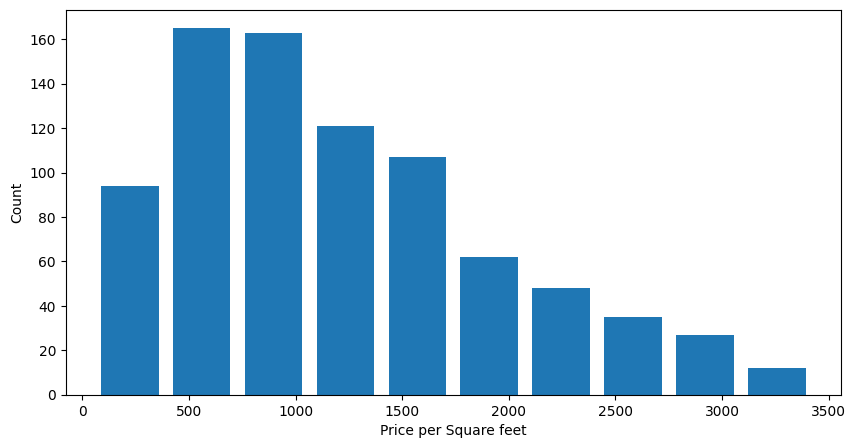

In [28]:
matplotlib.rcParams["figure.figsize"]= (10,5)
plt.hist(df5.price_per_sqft,rwidth=0.8)
plt.xlabel("Price per Square feet")
plt.ylabel("Count")

Visualizing Total Area (sqft) vs. Price(in lakhs)

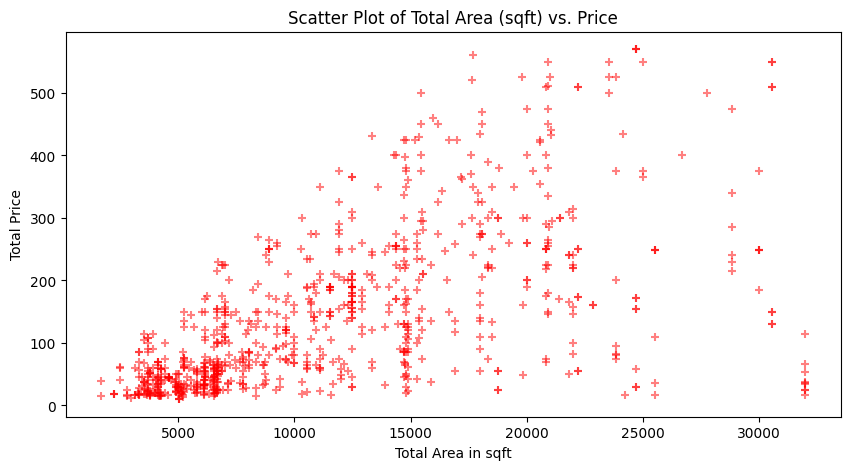

In [29]:
plt.figure(figsize=(10, 5))  
plt.scatter(df5['Total_sqft'], df5['Price (in Lakhs)'], alpha=0.5,color='red',marker='+')
plt.title('Scatter Plot of Total Area (sqft) vs. Price')
plt.xlabel('Total Area in sqft')
plt.ylabel('Total Price')
plt.show()

In [30]:
# Performed one-hot encoding on column 'Locality'

dummies=pd.get_dummies(df5.Locality)
dummies.head(5)

,"Abhimanyu Apartments, Vasundhara Enclave","Abul Fazal Enclave Part 1, Okhla","Abul Fazal Enclave Part-II, Okhla","Adarsh Homes, Dwarka Mor",Alaknanda,"Amar Colony, Lajpat Nagar","Andheria Mor, Mehrauli","Arjun Nagar, Safdarjung Enclave","Ashirwad Apartments, Dwarka Sector 12","Balbir Nagar, Shahdara",...,Uttam Nagar West,Vasant Kunj,Vasant Kunj Sector C,"Vasant Vihar Builder Floor, Vasant Vihar",Vasundhara Enclave,"Vikram Vihar, Lajpat Nagar","Vinoba Puri, Lajpat Nagar","Virat Residency, Dwarka Mor","Yamuna Apartment, Alaknanda","Yamuna Vihar, Shahdara"
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [31]:
# Concatinating it with main dataframe
df5=pd.concat([df5,dummies.drop('Other',axis='columns')],axis='columns')
df5.head()

,BHK,Bathroom,Furnishing,Locality,Total_sqft,Price (in Lakhs),price_per_sqft,"Abhimanyu Apartments, Vasundhara Enclave","Abul Fazal Enclave Part 1, Okhla","Abul Fazal Enclave Part-II, Okhla",...,Uttam Nagar West,Vasant Kunj,Vasant Kunj Sector C,"Vasant Vihar Builder Floor, Vasant Vihar",Vasundhara Enclave,"Vikram Vihar, Lajpat Nagar","Vinoba Puri, Lajpat Nagar","Virat Residency, Dwarka Mor","Yamuna Apartment, Alaknanda","Yamuna Vihar, Shahdara"
0,3,2.0,Semi-Furnished,Rohini Sector 25,6500.0,65.0,1000.000000,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2,2.0,Semi-Furnished,"J R Designers Floors, Rohini Sector 24",6667.0,50.0,749.962502,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,2,2.0,Furnished,Other,6667.0,155.0,2324.883756,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,2,2.0,Semi-Furnished,Rohini Sector 24,6667.0,42.0,629.968502,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,2,2.0,Semi-Furnished,Rohini Sector 24,6667.0,62.0,929.953502,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [32]:
df6=df5.drop(['Locality','Furnishing','price_per_sqft'],axis='columns')
df6.head()

,BHK,Bathroom,Total_sqft,Price (in Lakhs),"Abhimanyu Apartments, Vasundhara Enclave","Abul Fazal Enclave Part 1, Okhla","Abul Fazal Enclave Part-II, Okhla","Adarsh Homes, Dwarka Mor",Alaknanda,"Amar Colony, Lajpat Nagar",...,Uttam Nagar West,Vasant Kunj,Vasant Kunj Sector C,"Vasant Vihar Builder Floor, Vasant Vihar",Vasundhara Enclave,"Vikram Vihar, Lajpat Nagar","Vinoba Puri, Lajpat Nagar","Virat Residency, Dwarka Mor","Yamuna Apartment, Alaknanda","Yamuna Vihar, Shahdara"
0,3,2.0,6500.0,65.0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2,2.0,6667.0,50.0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,2,2.0,6667.0,155.0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,2,2.0,6667.0,42.0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,2,2.0,6667.0,62.0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [33]:
df6.shape

(834, 152)

In [34]:
# Assigning values to X and Y
X= df6.drop('Price (in Lakhs)',axis='columns')
X.head()

,BHK,Bathroom,Total_sqft,"Abhimanyu Apartments, Vasundhara Enclave","Abul Fazal Enclave Part 1, Okhla","Abul Fazal Enclave Part-II, Okhla","Adarsh Homes, Dwarka Mor",Alaknanda,"Amar Colony, Lajpat Nagar","Andheria Mor, Mehrauli",...,Uttam Nagar West,Vasant Kunj,Vasant Kunj Sector C,"Vasant Vihar Builder Floor, Vasant Vihar",Vasundhara Enclave,"Vikram Vihar, Lajpat Nagar","Vinoba Puri, Lajpat Nagar","Virat Residency, Dwarka Mor","Yamuna Apartment, Alaknanda","Yamuna Vihar, Shahdara"
0,3,2.0,6500.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2,2.0,6667.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,2,2.0,6667.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,2,2.0,6667.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,2,2.0,6667.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [35]:
Y = df6['Price (in Lakhs)']
Y.head()

0     65.0
1     50.0
2    155.0
3     42.0
4     62.0
Name: Price (in Lakhs), dtype: float64

Splitting data into Training and Testing Data

In [36]:
df6.isnull().sum()

BHK                                         0
Bathroom                                    0
Total_sqft                                  0
Price (in Lakhs)                            0
Abhimanyu Apartments, Vasundhara Enclave    0
                                           ..
Vikram Vihar, Lajpat Nagar                  0
Vinoba Puri, Lajpat Nagar                   0
Virat Residency, Dwarka Mor                 0
Yamuna Apartment, Alaknanda                 0
Yamuna Vihar, Shahdara                      0
Length: 152, dtype: int64

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

Model Training

In [38]:
reg=linear_model.LinearRegression()
reg.fit(X_train,y_train)
reg.score(X_test,y_test)

0.7838614356041069

In [39]:
print(X.shape,X_train.shape,X_test.shape)
print(Y.shape,y_train.shape,y_test.shape)

(834, 151) (667, 151) (167, 151)
(834,) (667,) (167,)


Evaluation

In [40]:
#Prediction on training data
training_data_predict = reg.predict(X_train)
print(training_data_predict)

[ 1.09170673e+02  2.56966379e+02  2.22978568e+01  2.35459819e+01
  1.06011151e+02  4.22003701e+01  9.62412772e+01  2.11000144e+02
  2.91206512e+01  6.28182390e+01  3.04997125e+01  1.05250461e+02
  2.40000000e+01  3.99995458e+02  3.51306315e+02  3.70873622e+01
 -8.40046378e-01  1.46530102e+02  8.57247555e+01  5.06342799e+01
  1.67720485e+01 -1.68430151e+00  4.62000000e+01  1.72955658e+02
  4.52120576e+01  2.91499856e+02  3.09172228e+02  4.37230319e+01
  3.85567918e+02  3.69149118e+02  1.32791222e+02  9.34550100e+01
  3.90108635e+01 -2.67004035e+01  8.98001866e+01  4.54221399e+02
  9.37518046e+01  8.98121545e+01  2.33009615e+01  1.65209718e+02
  7.29390700e+01  3.55778601e+02  1.18277644e+02  1.06011151e+02
  1.78204707e+02  2.46930512e+02  3.00000000e+01  7.50000000e+01
  1.32144049e+02  4.43879054e+01  1.44998563e+01  7.29090854e+01
  5.89000000e+01  4.50254280e-01  2.97397009e+02  4.73668960e+01
  2.12372775e+02  1.42309463e+02  1.38136226e+02  2.10904512e+01
  2.77129693e+02  4.13736

In [41]:
from sklearn import metrics
#Mean Absolute Error
score_1= metrics.mean_absolute_error(y_train,training_data_predict)
print("Mean Absolute Error : ",score_1)
mean_y = np.mean(y_train)
relative_mae_mean = (score_1 / mean_y)*100
print("Relative MAE (using mean of target variable) in %:", relative_mae_mean)


Mean Absolute Error :  30.108849351588248
Relative MAE (using mean of target variable) in %: 21.0031495595551


Visualizing Actual and Predicted prices

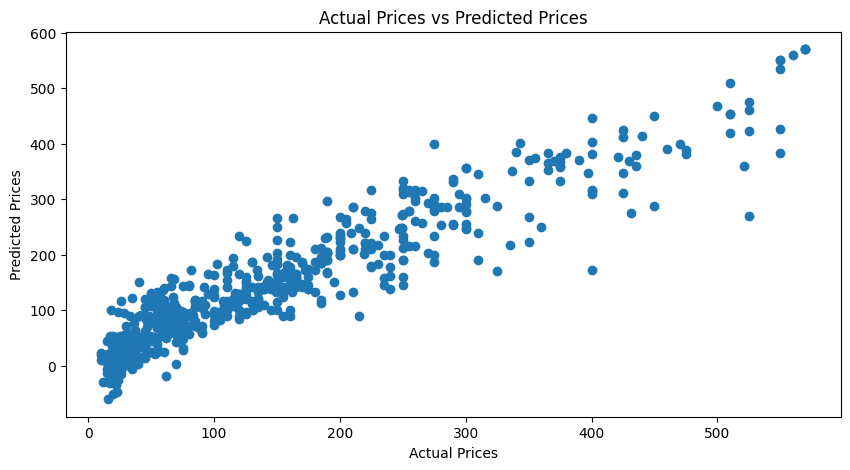

In [42]:
plt.figure(figsize=(10, 5)) 
# Plotting Actual prices
plt.scatter(y_train,training_data_predict)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs Predicted Prices" )
plt.show()

So, This Closeness depicts that our model is predicting approximately values of House prices close to actual prices 

Now Let's Predict on Testing Data

In [43]:
#Prediction on Testing Data
test_data_predict = reg.predict(X_test)
print(test_data_predict)


[132.351945   111.37661446  83.76459217  54.02729152 114.03650731
 217.06721178  49.18122717 207.657616   179.11728972 113.88008395
  44.3879054  -41.00028747  79.85290703 255.19503009 281.98934584
  89.8177607   73.55914525 112.11700225 265.459216   141.12990625
  88.3605891  252.8592509   81.69718483 211.2808363  195.70249672
 332.45950347 170.63745268 120.41460475 134.82634964 124.52601608
 129.32931782 120.03684426  -4.18204847 159.95573431 326.5133599
 182.53249532 213.1801143  497.20842563  29.4        299.20373677
 243.78460296  50.79685853 174.         278.28112377 155.27969548
 103.93802844 181.03679478 111.20441984 133.31745517 116.49315371
 -20.81369781 485.49538439 129.83782246  82.44268642  84.42161957
 172.         365.         239.95594518 142.30946272 248.1580531
  14.37269237 151.17344946 168.87492571 111.04566026 -16.43534872
 208.87340628  80.00921579  42.32878429 106.01115101 189.07343611
 143.41567773  36.71184178 367.20768844 111.9426863   42.24225635
  50.4558526

In [44]:
score_2= metrics.mean_absolute_error(y_test,test_data_predict)
print("Mean Absolute Error : ",score_2)
mean_y1 = np.mean(y_test)
relative_mae_mean2 = (score_2 / mean_y1)*100
print("Relative MAE (using mean of target variable) in %:", relative_mae_mean2)


Mean Absolute Error :  40.948205860399625
Relative MAE (using mean of target variable) in %: 27.08590115494075


Now my model for Predicting House Prices has been evaluated successfully both on Training as well as Testing Data
And it is predicting approx. correct prices

Let's Make a function to predict the House prices through this Model by passing parameter values 

In [45]:
X.columns

Index(['BHK', 'Bathroom', 'Total_sqft',
       'Abhimanyu Apartments, Vasundhara Enclave',
       'Abul Fazal Enclave Part 1, Okhla', 'Abul Fazal Enclave Part-II, Okhla',
       'Adarsh Homes, Dwarka Mor', 'Alaknanda', 'Amar Colony, Lajpat Nagar',
       'Andheria Mor, Mehrauli',
       ...
       'Uttam Nagar West', 'Vasant Kunj', 'Vasant Kunj Sector C',
       'Vasant Vihar Builder Floor, Vasant Vihar', 'Vasundhara Enclave',
       'Vikram Vihar, Lajpat Nagar', 'Vinoba Puri, Lajpat Nagar',
       'Virat Residency, Dwarka Mor', 'Yamuna Apartment, Alaknanda',
       'Yamuna Vihar, Shahdara'],
      dtype='object', length=151)

In [46]:
def house_price_prediction(Locality,BHK,Bathroom,Total_sqft):
    loc_index=np.where(X.columns == Locality)[0][0]
    x=np.zeros(len(X.columns))
    x[0]=BHK
    x[1]=Bathroom
    x[2]=Total_sqft
    if loc_index>=0:
        x[loc_index]=1
        
    return reg.predict([x])[0]
    
    

In [51]:
warnings.filterwarnings("ignore", category=UserWarning)

In [52]:
house_price_prediction('Alaknanda',3,2.0,5000)

148.9004351913795

Approx Price of 5000 sqft area 3 BHK House in 'Alaknanda' with 2 bathrooms is 148.9 lakhs according to the trained data

In [53]:
house_price_prediction('Uttam Nagar West',2,2.0,3000)

27.13612245093549

Approx Price of 3000 sqft area 2 BHK House in 'Uttam Nagar West' with 2 bathrooms is 27.1 lakhs according to the trained data

In [54]:
house_price_prediction('Yamuna Vihar, Shahdara',3,3.0,6000)

148.1673967182896

Approx Price of 6000 sqft area 3 BHK House in Yamuna Vihar, Shahdara with 3 bathrooms is 148 lakhs according to the trained data

In [55]:
house_price_prediction('Adarsh Homes, Dwarka Mor',2,2.0,4000)

27.336734597414363

Approx Price of 4000sqft area 2 BHK House in Adarsh Homes, Dwarka Mor with 2 bathrooms is 27.3 lakhs according to the trained data

Hence, Our Model is Working Properly